In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
customer=pd.read_csv("Customer.csv")
transaction=pd.read_csv("Transactions.csv")
Prod=pd.read_csv("prod_cat_info.csv")

# Exploratory Data Analysis

In [3]:
customer.shape

(5647, 4)

In [4]:
Prod.shape


(23, 4)

In [5]:
transaction.shape

(23053, 10)

In [6]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [7]:
Prod.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [8]:
# renaming "prod_sub_cat_code" column in 'Prod' table to make it similar to 'transaction' table
# to merge the both the tables easily
Prod.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [9]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final

In [10]:
prod_concat = pd.merge(left=transaction, right=Prod,on=["prod_cat_code","prod_subcat_code"],how="left")

In [11]:
prod_concat

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [12]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

# Merge 'customer' and 'prod_concat' tables

In [13]:
customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [14]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [16]:
customer_final.shape

(23053, 16)

In [17]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [18]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [19]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")

In [20]:
customer_final["DOB"]

0       1981-09-26
1       1973-05-11
2       1992-07-27
3       1981-06-08
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [21]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

In [22]:
customer_final["tran_date"]

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

# Checking for duplicate values

In [23]:
customer_final.duplicated().sum()

13

In [24]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

In [25]:
customer_final.duplicated().sum()

0

# 2. Prepare a summary report for the merged data set

## (a) Get the column names and their corresponding data types

In [27]:
#column names of "customer_final" dataframe
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [28]:
# data types of all columns of "customer_final" dataframe
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

## (b) Top/Bottom 10 observations

In [29]:
# top 10 observations
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [30]:
#bottom 10 observations
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


In [36]:
customer_final['customer_Id']=customer_final['customer_Id'].astype(str)
customer_final['city_code']=customer_final['city_code'].astype(str)
customer_final['transaction_id']=customer_final['transaction_id'].astype(str)
customer_final['cust_id']=customer_final['cust_id'].astype(str)
customer_final['prod_subcat_code']=customer_final['prod_subcat_code'].astype(str)
customer_final['prod_cat_code']=customer_final['prod_cat_code'].astype(str)

In [37]:
customer_final.describe()

,Qty,Rate,Tax,total_amt
count,23040.000000,23040.000000,23040.000000,23040.000000
mean,2.435764,637.094965,248.677488,2109.865226
std,2.264326,621.727374,187.188311,2505.610295
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1756.950000
75%,4.000000,1109.000000,365.767500,3570.255000
max,5.000000,1500.000000,787.500000,8287.500000


## (d) Frequency tables for all the categorical variables

In [38]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Store_type,prod_cat,prod_subcat,customer_Id,Gender,city_code,prod_cat_code
count,23040,23040,23040,23040,23040,23040,23040,23040,23031,23040,23040
unique,20878,5506,12,6,4,6,18,5506,2,11,6
top,32263938079,269449,4,5,e-Shop,Books,Women,269449,M,4.0,5
freq,4,13,4000,6066,9304,6066,3046,13,11804,2422,6066


In [41]:
for i in customer_final.columns:
      if customer_final[i].dtype=='object':
            print(customer_final[i].value_counts())

32263938079    4
32537937507    3
99268713598    3
74269001881    3
27975020881    3
              ..
68173579419    1
10213463325    1
54565720016    1
14313576559    1
69625145896    1
Name: transaction_id, Length: 20878, dtype: int64
269449    13
268819    13
273014    12
270831    12
274227    12
          ..
268162     1
272284     1
273445     1
269616     1
268312     1
Name: cust_id, Length: 5506, dtype: int64
4     4000
3     3065
10    2991
1     2948
11    2057
12    2027
7     1043
2     1007
6      989
9      985
8      970
5      958
Name: prod_subcat_code, dtype: int64
5    6066
3    4895
6    4126
2    2996
1    2960
4    1997
Name: prod_cat_code, dtype: int64
e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64
Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64
Women        

# (3) Generate histograms for all continuous variables and frequency bars for categorical variables

In [42]:
conti_var = customer_final.loc[:,[ 'Qty', 'Rate', 'Tax', 'total_amt']]

In [43]:
conti_var.columns

Index(['Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

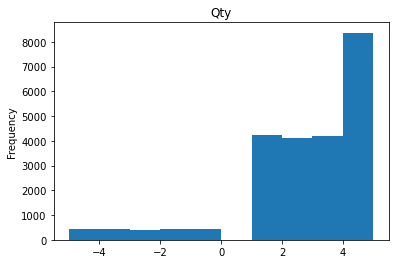

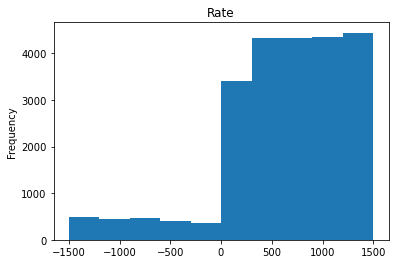

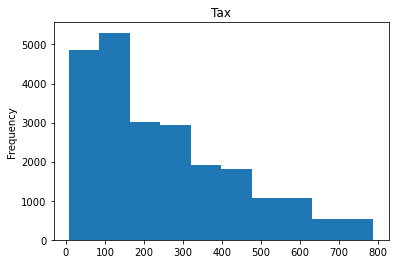

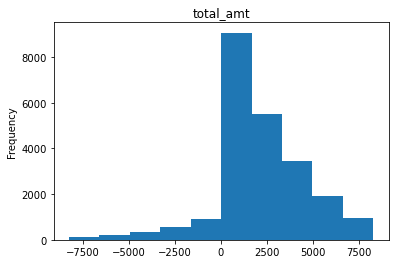

In [44]:
for var in conti_var.columns:
    conti_var[var].plot(kind='hist')
    plt.title(var)
    plt.show()
    

# Bar chart of categorical variables

In [45]:
category_var = customer_final.loc[:,customer_final.dtypes=='object']

In [46]:
category_var.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Store_type,prod_cat,prod_subcat,customer_Id,Gender,city_code,prod_cat_code
0,80712190438,270351,1,1,e-Shop,Clothing,Women,270351,M,5.0,1
1,29258453508,270384,5,3,e-Shop,Electronics,Computers,270384,F,8.0,3
2,51750724947,273420,6,5,TeleShop,Books,DIY,273420,M,8.0,5
3,93274880719,271509,11,6,e-Shop,Home and kitchen,Bath,271509,M,3.0,6
4,51750724947,273420,6,5,TeleShop,Books,DIY,273420,M,8.0,5


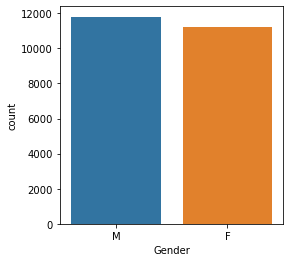

In [49]:
plt.figure(figsize=(4,4))
sns.countplot(category_var['Gender'])
plt.show()

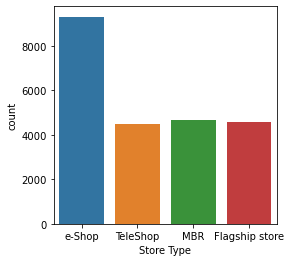

In [51]:
plt.figure(figsize=(4,4))
sns.countplot(category_var['Store_type'])
plt.xlabel('Store Type')
plt.show()

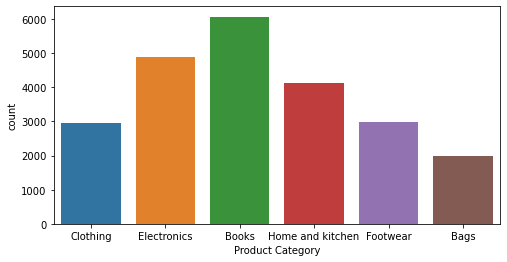

In [54]:
plt.figure(figsize=(8,4))
sns.countplot(category_var['prod_cat'])
plt.xlabel('Product Category')
plt.show()

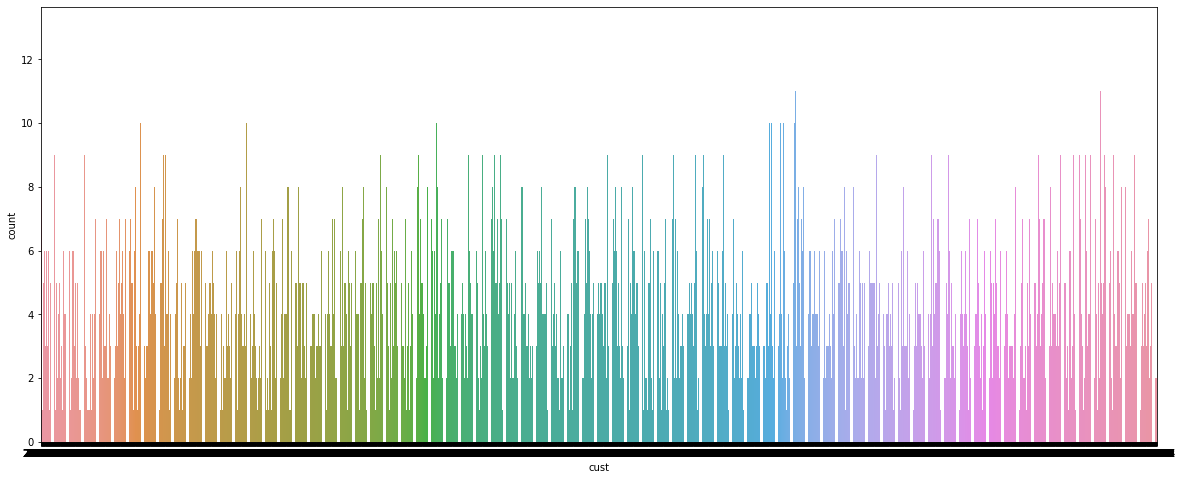

In [57]:
#plt.figure(figsize=(20,8))
#sns.countplot(category_var['cust_id'])
#plt.xlabel('cust')
#plt.show()

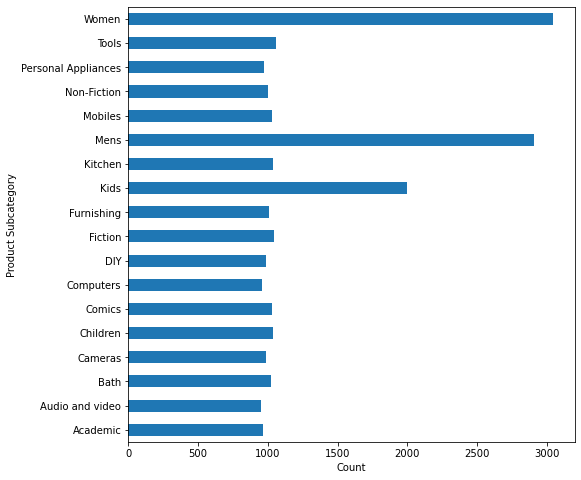

In [55]:
plt.figure(figsize=(8,8))
category_var.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

# (4) Calculate the following information using the merged dataset:

# (a) Time period of the available transaction data

In [59]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,prod_cat_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0,6
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0,6
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0,3
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0,3
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0,5
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0,3
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0,6
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-11-08,M,4.0,3


In [60]:
min_date = customer_final["tran_date"].min()
max_date = customer_final["tran_date"].max()

In [63]:
print("available transaction data is from "+ 
      pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

available transaction data is from 02-01-2011 to 02-12-2014


# (b) Count of transactions where the total amount of transaction was negative

In [66]:
#count of transaction_ids where total_amt was negative
negative_transaction = customer_final.loc[customer_final["Qty"] < 0,"transaction_id"].count()
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2164


In [65]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,prod_cat_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,1
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,3
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,5
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,6
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,5


# (5) Analyze which product categories are more popular among females vs male customers

In [71]:
#groupby the data set on the basis of "Gender" and "prod_cat"
product_gender=customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [73]:
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


# (6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [75]:
cust_city = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [76]:
cust_city

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
nan        8
Name: customer_Id, dtype: int64

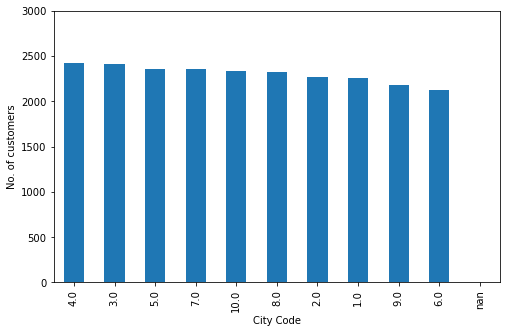

In [77]:
plt.figure(figsize=(8,5))
cust_city.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [84]:
((cust_city[4.0]/cust_city.sum()) * 100,

SyntaxError: unexpected EOF while parsing (<ipython-input-84-58e6602d5108>, line 1)

In [85]:
cust_city.sum()

23040

In [88]:
cust_city[4.0]

NameError: name 'count' is not defined

# (7) Which store type sells the maximum products by value and by quantity?

In [90]:
maxdf=customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

c:\python3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [92]:
maxdf.head(1)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770


# (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores

In [94]:
s_g = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

In [95]:
s_g

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1617933.27
Books,2493677.81,2496039.20,2545714.47,5297161.15
Clothing,1194423.23,1287686.34,1241834.36,2527193.57
Electronics,2215136.04,2107969.82,1978457.19,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.37,3327977.12


In [112]:
s_g.loc[["Clothing","Electronics"],"Flagship store"]


prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [98]:
# if we have to find total amount of both 'Clothing' and 'Electronics' from ' Flagship Store'
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

# (9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [113]:
male_cust= round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [114]:
male_cust

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.77
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.21,3020200.37
Home and kitchen,4133702.23,4305169.51


In [118]:
print("The total amount earned from Male customers under the Electronics category is",male_cust.loc["Electronics","M"])

The total amount earned from Male customers under the Electronics category is 5711351.62


# (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [119]:
#creating a new dataframe that does not contain transactions with negative values
p_trans = customer_final.loc[customer_final["total_amt"]>0,:]

In [120]:
p_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,prod_cat_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,3
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,6
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0,5
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0,5
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0,5
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0,1
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0,6
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0,5


In [124]:
# creating a dataframe that contains unique transactions 
uni_trans= p_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [125]:
uni_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [126]:
 #now finding the customers which have unique transactions greater than 10
uni_trans_count = uni_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [127]:
uni_trans_count

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [128]:
uni_trans_count[uni_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [129]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


# 11. For all customers aged between 25 - 35, find out:

# (a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [135]:
customer_final['AGE']=(customer_final['tran_date']- customer_final['DOB']).astype('<m8[Y]')

In [137]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [138]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,prod_cat_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,1,32.0,25-35
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,3,40.0,36-46
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,5,21.0,NaN
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,6,32.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,5,21.0,NaN


In [139]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [140]:
customer_25_35

Age_cat  prod_cat        
25-35    Bags                2182518.650
         Books               6753845.085
         Clothing            3346944.445
         Electronics         5702433.165
         Footwear            3297836.035
         Home and kitchen    4478862.245
36-46    Bags                1224141.100
         Books               3756950.275
         Clothing            1661516.675
         Electronics         3096945.930
         Footwear            1691532.895
         Home and kitchen    2332179.850
47-57    Bags                        NaN
         Books                       NaN
         Clothing                    NaN
         Electronics                 NaN
         Footwear                    NaN
         Home and kitchen            NaN
Name: total_amt, dtype: float64

In [141]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          6753845.085
         Electronics    5702433.165
Name: total_amt, dtype: float64

In [142]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 12456278.25


# (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [143]:
# filtering out data that belongs to the 'age_cat' = 25-35
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']

In [144]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [145]:
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,prod_cat_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,1,32.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,6,32.0,25-35
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0,3,31.0,25-35
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0,6,32.0,25-35
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0,3,34.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,9835488096,273310,2014-01-01,11,5,3,177,55.755,586.755,TeleShop,Books,Children,273310,1981-12-13,F,2.0,5,32.0,25-35
1060,69378805450,273472,2014-01-01,1,2,1,1242,130.410,1372.410,e-Shop,Footwear,Mens,273472,1983-03-08,M,4.0,2,30.0,25-35
1062,71241456072,268863,2014-01-01,3,5,2,462,97.020,1021.020,Flagship store,Books,Comics,268863,1981-11-08,F,3.0,5,32.0,25-35
1063,69368153122,273627,2014-01-01,7,5,3,311,97.965,1030.965,TeleShop,Books,Fiction,273627,1985-06-18,M,8.0,5,28.0,25-35


In [146]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 746825.3
